## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Exploration

In [ ]:
df = pd.read_csv('/QueryResults.csv', names=('DATE', 'TAG', 'POSTS'), header=0)

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df.head()
df.tail()

,DATE,TAG,POSTS
2728,2024-12-01 00:00:00,php,436
2729,2024-12-01 00:00:00,python,2740
2730,2024-12-01 00:00:00,r,554
2731,2024-12-01 00:00:00,ruby,53
2732,2024-12-01 00:00:00,swift,324


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.shape

(2733, 3)

**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.count()

,0
DATE,2733
TAG,2733
POSTS,2733


**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.loc[df['POSTS'].idxmax()]['TAG']

'python'

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
total = df.groupby('TAG').sum()
total['POSTS'].idxmax()


'javascript'

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,197,197
c,197,197
c#,198,198
c++,197,197
delphi,197,197
go,182,182
java,197,197
javascript,197,197
perl,197,197


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df.DATE = pd.to_datetime(df.DATE)

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

## Data Visualisaton with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [ ]:
reshaped_df.shape

(198, 14)

In [ ]:
reshaped_df.head()
reshaped_df.tail()
reshaped_df.columns
reshaped_df.count()
reshaped_df.fillna(0, inplace=True)
reshaped_df.isna().values.any()


False

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

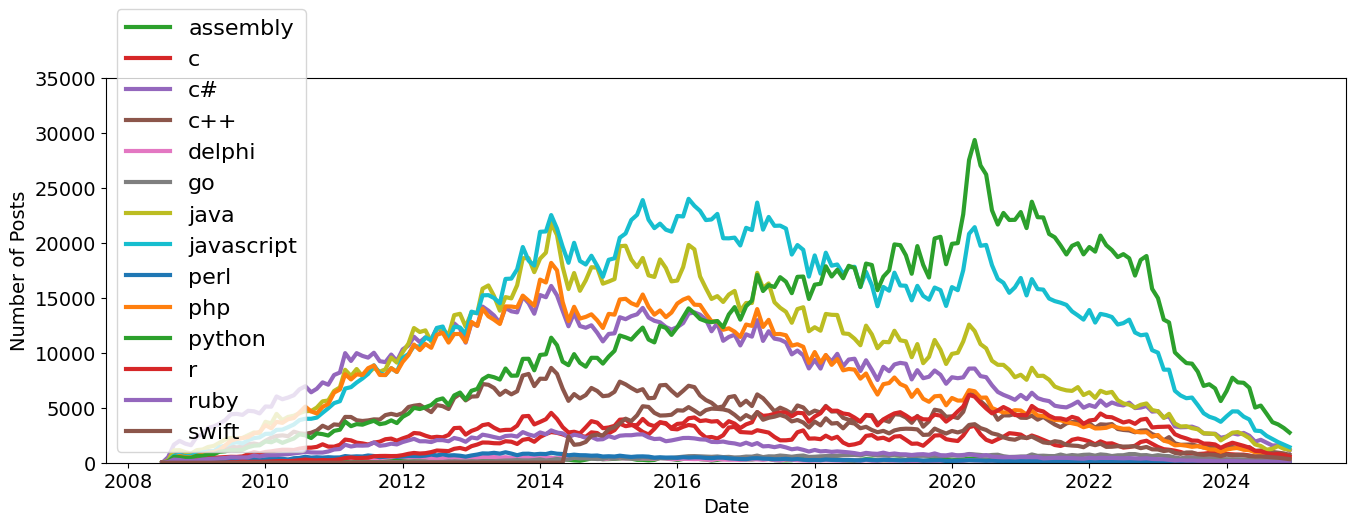

In [ ]:
from ctypes import pythonapi
year = reshaped_df.index
java = reshaped_df['java']
python = reshaped_df['python']
plt.figure(figsize=(16, 5))
plt.xticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.yticks(fontsize=14)
plt.plot(year, java)
plt.plot(year, python)
plt.legend(['Java', 'Python'], fontsize=16)


for column in reshaped_df.columns:
  plt.plot(year, reshaped_df[column], linewidth=3, label=column)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [ ]:
roll_df = reshaped_df.rolling(window=12).mean()

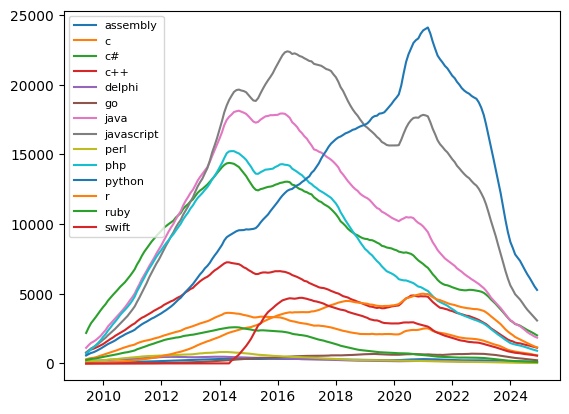

In [ ]:
for column in roll_df.columns:
  plt.plot(year, roll_df[column],label=column)
plt.legend(fontsize=8)